In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os 
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.image as mpimg

import PIL
import pathlib
import pandas as pd
import cv2


2024-03-22 23:50:14.140487: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
filename='dog.jpg'

#input_image = Image.open(filename)
image_path =  os.path.join(os. getcwd(), 'train_nLPp5K8')

df = pd.read_csv(os.path.join(os. getcwd(), 'train_nLPp5K8/train.csv'))
map={}

image_path = image_path+"/images"
cv2.imread(image_path+"/"+(os.listdir(image_path+"/")[0])).shape


(224, 224, 3)

In [3]:
x_train=[]
y_train =[]



for entr in df.values:
   
    sub_path=image_path+"/"+entr[0]

    img_arr=cv2.imread(sub_path)
    img_arr = cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB)
    #img_arr=cv2.resize(img_arr,(224,224))
    print(entr[0],entr[1])
    y = entr[1]
    y_train.append(y)
    x_train.append(img_arr)
    
    


11413.jpg 1
9863.jpg 1
997.jpg 0
5950.jpg 0
10454.jpg 1
7508.jpg 1
7288.jpg 1
9602.jpg 1
9028.jpg 0
12791.jpg 0
9629.jpg 1
15255.jpg 0
5751.jpg 1
4395.jpg 1
22994.jpg 0
26404.jpg 0
5485.jpg 1
20063.jpg 0
25121.jpg 0
6467.jpg 1
19985.jpg 0
3492.jpg 1
11638.jpg 0
23501.jpg 0
9299.jpg 1
16957.jpg 0
15353.jpg 0
27063.jpg 0
7319.jpg 1
748.jpg 0
8145.jpg 1
7618.jpg 1
9518.jpg 0
25267.jpg 0
5797.jpg 0
8603.jpg 1
11725.jpg 0
17460.jpg 0
7273.jpg 1
6833.jpg 1
28827.jpg 0
25277.jpg 0
15422.jpg 0
12729.jpg 0
299.jpg 0
11682.jpg 0
14440.jpg 0
3413.jpg 1
4443.jpg 1
17555.jpg 0
10629.jpg 0
7810.jpg 1
2418.jpg 1
11325.jpg 1
13198.jpg 0
23348.jpg 0
2790.jpg 1
1381.jpg 1
9508.jpg 0
5660.jpg 1
1516.jpg 1
6103.jpg 1
11383.jpg 1
15092.jpg 0
4123.jpg 1
8343.jpg 1
7662.jpg 1
26358.jpg 0
260.jpg 0
28736.jpg 0
19937.jpg 0
4080.jpg 1
5090.jpg 1
15434.jpg 0
6213.jpg 1
24516.jpg 0
22816.jpg 0
5894.jpg 0
9401.jpg 1
20108.jpg 0
15093.jpg 0
20446.jpg 0
8243.jpg 1
14571.jpg 0
747.jpg 0
10643.jpg 0
8940.jpg 0
23039.j

5161.jpg 1
17613.jpg 0
2042.jpg 1
10376.jpg 1
4065.jpg 1
6885.jpg 1
349.jpg 0
11438.jpg 1
5368.jpg 1
2201.jpg 1
10996.jpg 1
6210.jpg 1
2751.jpg 1
14264.jpg 0
13086.jpg 0
27120.jpg 0
314.jpg 0
24653.jpg 0
15558.jpg 0
9159.jpg 0
1823.jpg 1
22877.jpg 0
9252.jpg 1
6914.jpg 1
15223.jpg 0
20499.jpg 0
26479.jpg 0
12878.jpg 0
17161.jpg 0
3563.jpg 1
13234.jpg 0
20491.jpg 0
20017.jpg 0
8855.jpg 0
2809.jpg 1
24668.jpg 0
11504.jpg 0
14178.jpg 0
1618.jpg 1
4408.jpg 1
3479.jpg 1
9449.jpg 1
27088.jpg 0
5301.jpg 1
8729.jpg 1
762.jpg 0
3372.jpg 1
4330.jpg 1
8639.jpg 1
25132.jpg 0
7160.jpg 1
23384.jpg 0
7043.jpg 1
17062.jpg 0
27078.jpg 0
6624.jpg 1
2.jpg 0
764.jpg 0
8518.jpg 0
3824.jpg 1
20271.jpg 0
8654.jpg 1
24615.jpg 0
19953.jpg 0
2492.jpg 1
6003.jpg 0
14475.jpg 0
11670.jpg 0
23482.jpg 0
6844.jpg 1
8658.jpg 1
11451.jpg 0
5749.jpg 1
348.jpg 0
1024.jpg 0
24390.jpg 0
20360.jpg 0
6769.jpg 1
7582.jpg 1
25283.jpg 0
8102.jpg 1
17535.jpg 0
11142.jpg 1
7890.jpg 1
24330.jpg 0
1401.jpg 1
10600.jpg 0
29023.jpg 0

3681.jpg 1
27198.jpg 0
15024.jpg 0
22921.jpg 0
7840.jpg 1
2490.jpg 1
4360.jpg 1
1942.jpg 1
4663.jpg 1
10834.jpg 1
6620.jpg 1
7647.jpg 1
2564.jpg 1
29022.jpg 0
17306.jpg 0
115.jpg 0
7762.jpg 1
1851.jpg 1
5528.jpg 1
7656.jpg 1
11723.jpg 0
7438.jpg 1
2126.jpg 1
5298.jpg 1
3019.jpg 1
8968.jpg 0
20080.jpg 0
11520.jpg 0
8933.jpg 0
4043.jpg 1
3349.jpg 1
28772.jpg 0
20107.jpg 0
2526.jpg 1
6482.jpg 1
5502.jpg 1
14963.jpg 0
25033.jpg 0
2051.jpg 1
9316.jpg 1
1124.jpg 0
2862.jpg 1
5282.jpg 1
7419.jpg 1
23414.jpg 0
6564.jpg 1
10626.jpg 0
3997.jpg 1
8905.jpg 0
1224.jpg 0
8588.jpg 1
15355.jpg 0
4404.jpg 1
26419.jpg 0
5512.jpg 1
2675.jpg 1
27197.jpg 0
6806.jpg 1
17366.jpg 0
8095.jpg 1
3399.jpg 1
11061.jpg 1
17214.jpg 0
9268.jpg 1
4062.jpg 1
20039.jpg 0
25236.jpg 0
14204.jpg 0
2402.jpg 1
959.jpg 0
2197.jpg 1
9816.jpg 1
5933.jpg 0
24319.jpg 0
8463.jpg 0
7525.jpg 1
7833.jpg 1
7473.jpg 1
13188.jpg 0
11433.jpg 1
2722.jpg 1
2821.jpg 1
4908.jpg 1
4909.jpg 1
22929.jpg 0
14902.jpg 0
23507.jpg 0
7963.jpg 1
108.

6400.jpg 1
3118.jpg 1
12726.jpg 0
15424.jpg 0
4028.jpg 1
13178.jpg 0
23420.jpg 0
7403.jpg 1
11035.jpg 1
4380.jpg 1
3198.jpg 1
9503.jpg 0
9770.jpg 1
2707.jpg 1
27003.jpg 0
9394.jpg 1
2334.jpg 1
3487.jpg 1
14546.jpg 0
20032.jpg 0
8974.jpg 0
9988.jpg 1
9858.jpg 1
17522.jpg 0
6390.jpg 1
27286.jpg 0
3037.jpg 1
27019.jpg 0
16860.jpg 0
11420.jpg 1
20443.jpg 0
4145.jpg 1
15350.jpg 0
1941.jpg 1
21155.jpg 0
22817.jpg 0
27096.jpg 0
14648.jpg 0
14690.jpg 0
11157.jpg 1
8525.jpg 0
3576.jpg 1
4338.jpg 1
6339.jpg 1
3776.jpg 1
9667.jpg 1
9608.jpg 1
7244.jpg 1
25036.jpg 0
20125.jpg 0
20130.jpg 0
10471.jpg 1
6036.jpg 0
10268.jpg 1
2782.jpg 1
14909.jpg 0
4002.jpg 1
11734.jpg 0
899.jpg 0
10372.jpg 1
10053.jpg 1
4526.jpg 1
14713.jpg 0
15614.jpg 0
14229.jpg 0
11455.jpg 0
4250.jpg 1
26410.jpg 0
166.jpg 0
5326.jpg 1
10504.jpg 1
5095.jpg 1
11711.jpg 0
19966.jpg 0
5859.jpg 0
1343.jpg 1
6894.jpg 1
874.jpg 0
26506.jpg 0
12825.jpg 0
27069.jpg 0
24952.jpg 0
21044.jpg 0
8408.jpg 1
6646.jpg 1
1721.jpg 1
3637.jpg 1
315

25237.jpg 0
14252.jpg 0
10762.jpg 1
1511.jpg 1
25167.jpg 0
27098.jpg 0
8656.jpg 1
6312.jpg 1
761.jpg 0
12967.jpg 0
11337.jpg 1
17422.jpg 0
15321.jpg 0
14805.jpg 0
6707.jpg 1
904.jpg 0
4813.jpg 1
4925.jpg 1
5293.jpg 1
8634.jpg 1
25137.jpg 0
4286.jpg 1
5671.jpg 1
10428.jpg 1
3800.jpg 1
9577.jpg 0
6963.jpg 1
21159.jpg 0
14918.jpg 0
4958.jpg 1
1261.jpg 0
12695.jpg 0
17423.jpg 0
20117.jpg 0
14399.jpg 0
26507.jpg 0
22924.jpg 0
17421.jpg 0
23527.jpg 0
7258.jpg 1
10404.jpg 1
2095.jpg 1
17055.jpg 0
4027.jpg 1
266.jpg 0
29001.jpg 0
4599.jpg 1
5030.jpg 1
5060.jpg 1
11318.jpg 1
14288.jpg 0
5480.jpg 1
10869.jpg 1
23543.jpg 0
20190.jpg 0
4780.jpg 1
27160.jpg 0
14777.jpg 0
28955.jpg 0
12759.jpg 0
17223.jpg 0
14802.jpg 0
356.jpg 0
23487.jpg 0
10260.jpg 1
3113.jpg 1
2945.jpg 1
1748.jpg 1
2029.jpg 1
10994.jpg 1
14285.jpg 0
5404.jpg 1
26377.jpg 0
5888.jpg 0
23398.jpg 0
21089.jpg 0
7251.jpg 1
14262.jpg 0
5745.jpg 1
72.jpg 0
26471.jpg 0
6813.jpg 1
9422.jpg 1
13074.jpg 0
6911.jpg 1
15265.jpg 0
25210.jpg 0
2

24275.jpg 0
26372.jpg 0
3628.jpg 1
364.jpg 0
20196.jpg 0
8567.jpg 0
769.jpg 0
20422.jpg 0
14177.jpg 0
9047.jpg 0
23228.jpg 0
2324.jpg 1
20151.jpg 0
4348.jpg 1
9120.jpg 0
5295.jpg 1
28754.jpg 0
20062.jpg 0
1202.jpg 0
8576.jpg 1
17363.jpg 0
9379.jpg 1
7815.jpg 1
3217.jpg 1
2941.jpg 1
5083.jpg 1
24957.jpg 0
6397.jpg 1
4729.jpg 1
6891.jpg 1
6167.jpg 1
6472.jpg 1
8332.jpg 1
14655.jpg 0
6408.jpg 1
2133.jpg 1
20018.jpg 0
2124.jpg 1
11355.jpg 1
9889.jpg 1
10116.jpg 1
6296.jpg 1
7542.jpg 1
27124.jpg 0
1890.jpg 1
9473.jpg 1
3688.jpg 1
8508.jpg 0
3359.jpg 1
10971.jpg 1
11292.jpg 1
7485.jpg 1
4200.jpg 1
6250.jpg 1
7093.jpg 1
6152.jpg 1
20293.jpg 0
5159.jpg 1
17526.jpg 0
10358.jpg 1
24625.jpg 0
14928.jpg 0
226.jpg 0
1810.jpg 1
15196.jpg 0
286.jpg 0
11030.jpg 1
20451.jpg 0
15013.jpg 0
1389.jpg 1
5776.jpg 1
5792.jpg 0
3679.jpg 1
23013.jpg 0
17365.jpg 0
7577.jpg 1
344.jpg 0
17298.jpg 0
17316.jpg 0
27.jpg 0
4433.jpg 1
4976.jpg 1
1315.jpg 1
1787.jpg 1
4594.jpg 1
8803.jpg 0
1515.jpg 1
24356.jpg 0
4201.jp

22872.jpg 0
2909.jpg 1
8836.jpg 0
4208.jpg 1
10848.jpg 1
1111.jpg 0
9846.jpg 1
14564.jpg 0
20148.jpg 0
8921.jpg 0
2676.jpg 1
8030.jpg 1
7256.jpg 1
13054.jpg 0
15467.jpg 0
441.jpg 0
21102.jpg 0
2857.jpg 1
2978.jpg 1
6790.jpg 1
9315.jpg 1
12696.jpg 0
9516.jpg 0
5071.jpg 1
17589.jpg 0
11362.jpg 1
6524.jpg 1
502.jpg 0
7437.jpg 1
1683.jpg 1
20155.jpg 0
3883.jpg 1
14334.jpg 0
11807.jpg 0
4388.jpg 1
14835.jpg 0
2009.jpg 1
1586.jpg 1
23458.jpg 0
14138.jpg 0
9685.jpg 1
14724.jpg 0
5595.jpg 1
4090.jpg 1
14462.jpg 0
26437.jpg 0
27074.jpg 0
6281.jpg 1
26520.jpg 0
9724.jpg 1
11737.jpg 0
3888.jpg 1
9790.jpg 1
23023.jpg 0
491.jpg 0
9213.jpg 1
2589.jpg 1
9303.jpg 1
5940.jpg 0
25114.jpg 0
408.jpg 0
16939.jpg 0
13027.jpg 0
15538.jpg 0
7184.jpg 1
12942.jpg 0
21070.jpg 0
4.jpg 0
9464.jpg 1
7751.jpg 1
11809.jpg 1
5177.jpg 1
5682.jpg 1
28805.jpg 0
8521.jpg 0
2072.jpg 1
14959.jpg 0
24366.jpg 0
27108.jpg 0
10210.jpg 1
25258.jpg 0
28831.jpg 0
4282.jpg 1
6325.jpg 1
2373.jpg 1
19960.jpg 0
1421.jpg 1
9603.jpg 1
8

463.jpg 0
25221.jpg 0
15400.jpg 0
2256.jpg 0
9459.jpg 1
6376.jpg 1
8290.jpg 1
6908.jpg 1
4023.jpg 1
5889.jpg 0
19935.jpg 0
9054.jpg 0
16991.jpg 0
14388.jpg 0
17470.jpg 0
15272.jpg 0
8122.jpg 1
20089.jpg 0
3532.jpg 1
16962.jpg 0
9727.jpg 1
2678.jpg 1
10194.jpg 1
5125.jpg 1
10468.jpg 1
16983.jpg 0
27114.jpg 0
5032.jpg 1
6215.jpg 1
9711.jpg 1
11365.jpg 1
9506.jpg 0
2813.jpg 1
1793.jpg 1
6974.jpg 1
5877.jpg 0
7420.jpg 1
7159.jpg 1
7687.jpg 1
94.jpg 0
3716.jpg 1
26989.jpg 0
6085.jpg 1
20183.jpg 0
8512.jpg 0
10037.jpg 1
20027.jpg 0
17446.jpg 0
11308.jpg 1
1929.jpg 1
14691.jpg 0
2916.jpg 1
268.jpg 0
2588.jpg 1
17095.jpg 0
3937.jpg 1
11.jpg 0
7863.jpg 1
7372.jpg 1
1676.jpg 1
2841.jpg 1
2569.jpg 1
5880.jpg 0
5000.jpg 1
14145.jpg 0
8117.jpg 1
11312.jpg 1
22914.jpg 0
8598.jpg 1
1792.jpg 1
10531.jpg 0
17164.jpg 0
17387.jpg 0
12769.jpg 0
25043.jpg 0
3150.jpg 1
1558.jpg 1
23554.jpg 0
136.jpg 0
5028.jpg 1
3758.jpg 1
10695.jpg 0
9256.jpg 1
416.jpg 0
25134.jpg 0
6332.jpg 1
11119.jpg 1
2032.jpg 1
10064.

7641.jpg 1
3718.jpg 1
17502.jpg 0
15399.jpg 0
1913.jpg 1
14629.jpg 0
9902.jpg 1
14850.jpg 0
6464.jpg 1
22935.jpg 0
5082.jpg 1
23541.jpg 0
1395.jpg 1
21059.jpg 0
15066.jpg 0
24994.jpg 0
5592.jpg 1
9656.jpg 1
9243.jpg 1
3775.jpg 1
8062.jpg 1
2563.jpg 1
15217.jpg 0
9135.jpg 0
4763.jpg 1
24256.jpg 0
7071.jpg 1
367.jpg 0
5657.jpg 1
27285.jpg 0
11710.jpg 0
254.jpg 0
881.jpg 0
2473.jpg 1
11672.jpg 0
8410.jpg 1
11571.jpg 0
2650.jpg 1
7455.jpg 1
15334.jpg 0
11343.jpg 1
10662.jpg 0
8676.jpg 1
974.jpg 0
8372.jpg 1
4767.jpg 1
10112.jpg 1
1469.jpg 1
13228.jpg 0
20431.jpg 0
17455.jpg 0
8270.jpg 1
6266.jpg 1
8360.jpg 1
9118.jpg 0
10522.jpg 0
23234.jpg 0
3338.jpg 1
6691.jpg 1
6590.jpg 1
10396.jpg 1
7626.jpg 1
954.jpg 0
7062.jpg 1
7983.jpg 1
17394.jpg 0
10613.jpg 0
15348.jpg 0
2628.jpg 1
4585.jpg 1
4768.jpg 1
25146.jpg 0
15458.jpg 0
20114.jpg 0
8077.jpg 1
12749.jpg 0
9768.jpg 1
9895.jpg 1
20380.jpg 0
24470.jpg 0
2428.jpg 1
23037.jpg 0
368.jpg 0
11044.jpg 1
6050.jpg 0
6462.jpg 1
209.jpg 0
3251.jpg 1
425

26963.jpg 0
20081.jpg 0
6244.jpg 1
1882.jpg 1
26544.jpg 0
12778.jpg 0
21095.jpg 0
6863.jpg 1
7795.jpg 1
3024.jpg 1
13089.jpg 0
8694.jpg 1
4077.jpg 1
13130.jpg 0
3077.jpg 1
12770.jpg 0
9128.jpg 0
4150.jpg 1
11536.jpg 0
9216.jpg 1
10500.jpg 1
7976.jpg 1
15514.jpg 0
1353.jpg 1
8931.jpg 0
10543.jpg 0
23027.jpg 0
22992.jpg 0
25151.jpg 0
3971.jpg 1
27050.jpg 0
2406.jpg 1
1403.jpg 1
9220.jpg 1
17301.jpg 0
9272.jpg 1
11475.jpg 0
4231.jpg 1
2577.jpg 1
7878.jpg 1
1147.jpg 0
14275.jpg 0
11373.jpg 1
20041.jpg 0
8053.jpg 1
5337.jpg 1
5921.jpg 0
12850.jpg 0
25250.jpg 0
11048.jpg 1
5016.jpg 1
26378.jpg 0
8982.jpg 0
3707.jpg 1
12975.jpg 0
3564.jpg 1
1481.jpg 1
14532.jpg 0
6758.jpg 1
2088.jpg 1
4045.jpg 1
1527.jpg 1
3445.jpg 1
14950.jpg 0
25147.jpg 0
1930.jpg 1
263.jpg 0
6802.jpg 1
3014.jpg 1
9909.jpg 1
10892.jpg 1
11591.jpg 0
4452.jpg 1
161.jpg 0
9653.jpg 1
4687.jpg 1
10360.jpg 1
8529.jpg 0
6669.jpg 1
15406.jpg 0
10906.jpg 1
20494.jpg 0
8795.jpg 1
15157.jpg 0
13229.jpg 0
9490.jpg 0
10186.jpg 1
1329.jp

12745.jpg 0
11745.jpg 0
13035.jpg 0
11652.jpg 0
14688.jpg 0
16901.jpg 0
29600.jpg 0
3584.jpg 1
6251.jpg 1
6101.jpg 1
9752.jpg 1
5128.jpg 1
2349.jpg 1
6278.jpg 1
8273.jpg 1
2005.jpg 1
7912.jpg 1
27195.jpg 0
14236.jpg 0
4180.jpg 1
3943.jpg 1
5435.jpg 1
7955.jpg 1
10803.jpg 1
15145.jpg 0
25256.jpg 0
5473.jpg 1
12922.jpg 0
2218.jpg 0
4169.jpg 1
3599.jpg 1
7575.jpg 1
13224.jpg 0
5276.jpg 1
16856.jpg 0
24981.jpg 0
13135.jpg 0
8545.jpg 0
17548.jpg 0
13218.jpg 0
22945.jpg 0
4636.jpg 1
5624.jpg 1
5333.jpg 1
14244.jpg 0
8900.jpg 0
17278.jpg 0
2778.jpg 1
78.jpg 0
14634.jpg 0
15004.jpg 0
10060.jpg 1
6678.jpg 1
4662.jpg 1
28765.jpg 0
24631.jpg 0
4038.jpg 1
3535.jpg 1
11193.jpg 1
10445.jpg 1
1960.jpg 1
17554.jpg 0
9259.jpg 1
17056.jpg 0
6013.jpg 0
5251.jpg 1
3192.jpg 1
23294.jpg 0
28949.jpg 0
13056.jpg 0
15021.jpg 0
20088.jpg 0
3477.jpg 1
10339.jpg 1
20475.jpg 0
8587.jpg 1
3050.jpg 1
8495.jpg 0
5623.jpg 1
17425.jpg 0
20072.jpg 0
2925.jpg 1
15628.jpg 0
12783.jpg 0
13064.jpg 0
11162.jpg 1
6883.jpg 1
2

2057.jpg 1
9019.jpg 0
2855.jpg 1
3223.jpg 1
14595.jpg 0
14642.jpg 0
5150.jpg 1
14968.jpg 0
21062.jpg 0
10343.jpg 1
1691.jpg 1
8627.jpg 1
15300.jpg 0
8467.jpg 0
28839.jpg 0
5904.jpg 0
24451.jpg 0
8074.jpg 1
13119.jpg 0
8338.jpg 1
9002.jpg 0
2824.jpg 1
1628.jpg 1
9825.jpg 1
15512.jpg 0
11765.jpg 0
9151.jpg 0
2013.jpg 1
6276.jpg 1
315.jpg 0
397.jpg 0
26490.jpg 0
4926.jpg 1
9725.jpg 1
25215.jpg 0
9404.jpg 1
10208.jpg 1
5994.jpg 0
14280.jpg 0
875.jpg 0
17020.jpg 0
2725.jpg 1
1946.jpg 1
17483.jpg 0
2869.jpg 1
23011.jpg 0
23293.jpg 0
24398.jpg 0
6853.jpg 1
8938.jpg 0
2214.jpg 0
28729.jpg 0
424.jpg 0
3901.jpg 1
24475.jpg 0
24284.jpg 0
7131.jpg 1
4607.jpg 1
17348.jpg 0
23053.jpg 0
7474.jpg 1
17572.jpg 0
26553.jpg 0
17492.jpg 0
23073.jpg 0
10838.jpg 1
21158.jpg 0
1307.jpg 1
8892.jpg 0
25011.jpg 0
20116.jpg 0
25265.jpg 0
15301.jpg 0
16919.jpg 0
23347.jpg 0
12907.jpg 0
8695.jpg 1
8990.jpg 0
20006.jpg 0
22956.jpg 0
9136.jpg 0
4100.jpg 1
17545.jpg 0
2837.jpg 1
24517.jpg 0
482.jpg 0
6192.jpg 1
9403.j

3573.jpg 1
17494.jpg 0
11176.jpg 1
28982.jpg 0
5695.jpg 1
14582.jpg 0
11184.jpg 1
23409.jpg 0
8839.jpg 0
1216.jpg 0
1189.jpg 0
9227.jpg 1
3204.jpg 1
13092.jpg 0
301.jpg 0
11604.jpg 0
20511.jpg 0
28811.jpg 0
3753.jpg 1
15401.jpg 0
11166.jpg 1
5249.jpg 1
13179.jpg 0
2623.jpg 1
9861.jpg 1
12751.jpg 0
8268.jpg 1
15472.jpg 0
13154.jpg 0
26942.jpg 0
20186.jpg 0
7196.jpg 1
9498.jpg 0
12883.jpg 0
6045.jpg 0
8250.jpg 1
111.jpg 0
16977.jpg 0
9113.jpg 0
13022.jpg 0
28849.jpg 0
21063.jpg 0
9170.jpg 0
7267.jpg 1
7087.jpg 1
22894.jpg 0
6230.jpg 1
1250.jpg 0
1651.jpg 1
22824.jpg 0
14237.jpg 0
14695.jpg 0
29590.jpg 0
1414.jpg 1
3045.jpg 1
11717.jpg 0
25271.jpg 0
10007.jpg 1
11214.jpg 1
12966.jpg 0
10145.jpg 1
4866.jpg 1
20091.jpg 0
14550.jpg 0
13036.jpg 0
4680.jpg 1
6639.jpg 1
370.jpg 0
22802.jpg 0
7987.jpg 1
20497.jpg 0
26368.jpg 0
17132.jpg 0
21104.jpg 0
20515.jpg 0
22858.jpg 0
194.jpg 0
5336.jpg 1
24436.jpg 0
10437.jpg 1
1345.jpg 1
9336.jpg 1
3624.jpg 1
23118.jpg 0
24527.jpg 0
2061.jpg 1
10715.jpg 

14208.jpg 0
9830.jpg 1
14680.jpg 0
14433.jpg 0
1392.jpg 1
25002.jpg 0
2616.jpg 1
3666.jpg 1
4117.jpg 1
11047.jpg 1
6284.jpg 1
374.jpg 0
2606.jpg 1
21214.jpg 0
347.jpg 0
26445.jpg 0
9228.jpg 1
6877.jpg 1
14168.jpg 0
9156.jpg 0
5703.jpg 1
2435.jpg 1
8019.jpg 1
23124.jpg 0
10710.jpg 0
1567.jpg 1
382.jpg 0
892.jpg 0
21034.jpg 0
2345.jpg 1
9004.jpg 0
5363.jpg 1
3316.jpg 1
24255.jpg 0
2651.jpg 1
1905.jpg 1
24340.jpg 0
3119.jpg 1
2767.jpg 1
3580.jpg 1
17540.jpg 0
1155.jpg 0
1231.jpg 0
4978.jpg 1
8975.jpg 0
8835.jpg 0
23380.jpg 0
7873.jpg 1
4111.jpg 1
7809.jpg 1
4587.jpg 1
4601.jpg 1
883.jpg 0
7856.jpg 1
9277.jpg 1
1861.jpg 1
8983.jpg 0
8413.jpg 1
9363.jpg 1
17399.jpg 0
25234.jpg 0
23452.jpg 0
8033.jpg 1
856.jpg 0
4842.jpg 1
15342.jpg 0
11471.jpg 0
7654.jpg 1
7481.jpg 1
6001.jpg 0
9570.jpg 0
1555.jpg 1
1915.jpg 1
13238.jpg 0
4459.jpg 1
4876.jpg 1
8187.jpg 1
4784.jpg 1
9310.jpg 1
14764.jpg 0
14391.jpg 0
28857.jpg 0
7300.jpg 1
17165.jpg 0
6054.jpg 0
5766.jpg 1
828.jpg 0
24513.jpg 0
3490.jpg 1
10

11781.jpg 0
14430.jpg 0
28847.jpg 0
1624.jpg 1
13123.jpg 0
2718.jpg 1
5050.jpg 1
4382.jpg 1
9208.jpg 1
5500.jpg 1
25145.jpg 0
1034.jpg 0
10943.jpg 1
27092.jpg 0
14594.jpg 0
15543.jpg 0
26449.jpg 0
277.jpg 0
1327.jpg 1
2617.jpg 1
6835.jpg 1
3720.jpg 1
22812.jpg 0
3497.jpg 1
2901.jpg 1
9974.jpg 1
1420.jpg 1
20249.jpg 0
1767.jpg 1
7879.jpg 1
14828.jpg 0
14260.jpg 0
24351.jpg 0
3139.jpg 1
24327.jpg 0
23324.jpg 0
89.jpg 0
10072.jpg 1
6552.jpg 1
4088.jpg 1
10720.jpg 0
8698.jpg 1
15274.jpg 0
12823.jpg 0
7698.jpg 1
4445.jpg 1
5039.jpg 1
4406.jpg 1
4347.jpg 1
12932.jpg 0
11261.jpg 1
22920.jpg 0
26558.jpg 0
5673.jpg 1
23463.jpg 0
10349.jpg 1
10398.jpg 1
24532.jpg 0
2999.jpg 1
15051.jpg 0
9432.jpg 1
7232.jpg 1
26346.jpg 0
143.jpg 0
12640.jpg 0
11248.jpg 1
2681.jpg 1
11008.jpg 1
5443.jpg 1
3976.jpg 1
14984.jpg 0
3950.jpg 1
4595.jpg 1
6530.jpg 1
24630.jpg 0
3483.jpg 1
23334.jpg 0
15056.jpg 0
28812.jpg 0
9331.jpg 1
15385.jpg 0
2656.jpg 1
15414.jpg 0
2090.jpg 1
20309.jpg 0
12650.jpg 0
6265.jpg 1
2880

11749.jpg 0
6341.jpg 1
15139.jpg 0
154.jpg 0
10353.jpg 1
7357.jpg 1
298.jpg 0
9270.jpg 1
23453.jpg 0
26497.jpg 0
7652.jpg 1
9109.jpg 0
11369.jpg 1
4846.jpg 1
20278.jpg 0
20086.jpg 0
8772.jpg 1
14933.jpg 0
10407.jpg 1
293.jpg 0
6254.jpg 1
11733.jpg 0
6434.jpg 1
2595.jpg 1
16851.jpg 0
5397.jpg 1
7456.jpg 1
17397.jpg 0
4246.jpg 1
13237.jpg 0
17612.jpg 0
4339.jpg 1
17577.jpg 0
3577.jpg 1
26370.jpg 0
7349.jpg 1
3934.jpg 1
23403.jpg 0
1021.jpg 0
7296.jpg 1
15050.jpg 0
14331.jpg 0
8052.jpg 1
6198.jpg 1
2531.jpg 1
22915.jpg 0
1258.jpg 0
9757.jpg 1
6064.jpg 0
9406.jpg 1
20302.jpg 0
7180.jpg 1
3426.jpg 1
15361.jpg 0
13103.jpg 0
25202.jpg 0
355.jpg 0
17480.jpg 0
26534.jpg 0
20199.jpg 0
19970.jpg 0
8373.jpg 1
10477.jpg 1
10512.jpg 1
3179.jpg 1
6435.jpg 1
11505.jpg 0
3762.jpg 1
7516.jpg 1
11295.jpg 1
3111.jpg 1
4289.jpg 1
12679.jpg 0
10918.jpg 1
3363.jpg 1
8303.jpg 1
19956.jpg 0
4188.jpg 1
27278.jpg 0
23525.jpg 0
12857.jpg 0
486.jpg 0
22851.jpg 0
13042.jpg 0
3307.jpg 1
1483.jpg 1
10134.jpg 1
10361.

In [4]:
len(x_train),len( y_train)

(12196, 12196)

In [5]:
# train_datagen = ImageDataGenerator(rescale = 1./255)

# train_path =os.path.join(os. getcwd(), 'train_nLPp5K8')
# training_set = train_datagen.flow_from_directory(train_path,
#                                                  target_size = (224, 224),
#                                                  batch_size = 32,
#                                                  class_mode = 'sparse')

In [6]:
y_train[0]

1

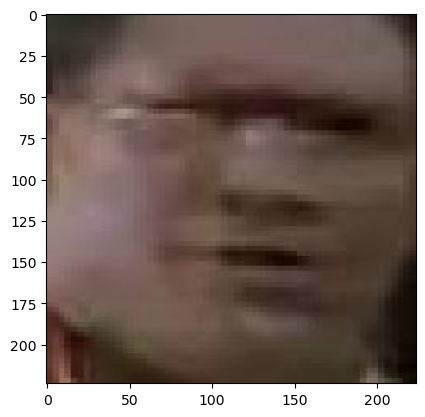

In [7]:
plt.imshow(x_train[0])

In [8]:
index = np.where(df == '14147.jpg')[0][0]
index

7169

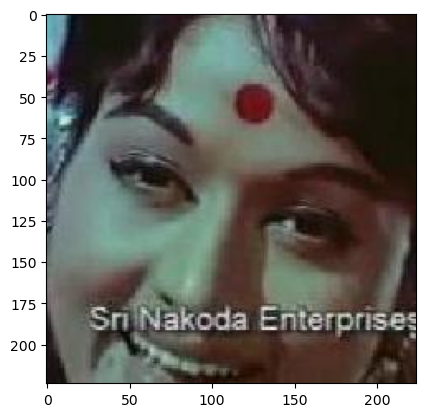

In [9]:
plt.imshow(x_train[7169])

In [10]:
from tensorflow.keras.preprocessing import image
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from IPython.display import Image
from tensorflow.keras.optimizers import Adam

mobile = MobileNet()
def prepare_image(img_array):
#     img_path = ''
#     img = image.load_img(img_path + file, target_size=(224, 224))
#     img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)


In [11]:
preprocessed_image = prepare_image(x_train[7169])
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 1s 816ms/step


[[('n03868863', 'oxygen_mask', 0.554494),
  ('n03724870', 'mask', 0.1907832),
  ('n03424325', 'gasmask', 0.07034047),
  ('n02667093', 'abaya', 0.032702155),
  ('n04229816', 'ski_mask', 0.02019107)]]

In [12]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [13]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.


base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                         

                                                                 
 conv_pw_8 (Conv2D)          (None, None, None, 512)   262144    
                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, None, None, 512)  2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, None, None, 512)   0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, None, None, 512)  4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, None, None, 512)  2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, None, None, 512)   0         
                                                                 
 conv_pw_9

In [14]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) 

model=Model(inputs=base_model.input,outputs=preds)




for layer in mobile.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in mobile.layers[:20]:
    layer.trainable=False
for layer in mobile.layers[20:]:
    layer.trainable=True

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, None, None, 512)  2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, None, None, 512)   0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, None, None, 512)  4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, None, None, 512)  2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, None, None, 512)   0         
                                                                 
 conv_pw_9 (Conv2D)          (None, None, None, 512)   262144    
                                                                 
 conv_pw_9

In [16]:
# train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

# train_generator=train_datagen.fit(x_train)

In [17]:
# x_train_new = x_train[:12000]
# y_train_new = y_train[:12000]

# x_val = x_train[12000:]

# y_val = y_train[12000:]
# x_train_new = np.array(x_train_new)
# x_val_new = np.array(x_val)

# from sklearn.model_selection import train_test_split

# val_split = 0.25
# x_train_new, x_val_new, y_train_new, y_val_new = train_test_split(x_train, y_train, test_size=val_split)

# x_train_new = np.array(x_train_new)
# x_val_new = np.array(x_val_new)


IMG_SIZE = 224

x_train_new =np.array( x_train)

y_train_new = np.array(y_train)


In [18]:
#model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#step_size_train=train_generator.n//train_generator.batch_size
model.fit(x_train_new, y_train_new,validation_split=0.1,steps_per_epoch=len(x_train) / 32, epochs=10)

Epoch 1/10


/Users/fci/anaconda3/lib/python3.11/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 43/381 [==>...........................] - ETA: 18:20 - loss: 0.6640 - accuracy: 0.7354


KeyboardInterrupt



In [ ]:
plt.imso

In [ ]:
plt.imshow(np.array(x_val_new[8]))

In [ ]:
y_val_new[8]

In [ ]:
y_train_new.shape,  x_train_new.shape

In [ ]:
pred =model.predict(x_train_new)

In [ ]:
plt.imshow(np.array(x_val_new[8]))

In [ ]:
pred[0]

In [ ]:
x_test=[]
y_test =[]

image_path =  os.path.join(os. getcwd(), 'train_nLPp5K8')

df_test = pd.read_csv(os.path.join(os. getcwd(), 'test_fkwGUNG.csv'))


len(df_test),len(df)
#df_test
# map={}

# image_path = image_path+"/images"
# cv2.imread(image_path+"/"+(os.listdir(image_path+"/")[0])).shape



# for entr in df.values:
   
#     sub_path=image_path+"/"+entr[0]

#     img_arr=cv2.imread(sub_path)
#     img_arr = cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB)
#     #img_arr=cv2.resize(img_arr,(224,224))
#     print(entr[0],entr[1])
#     y = entr[1]
#     y_train.append(y)
#     x_train.append(img_arr)
    
    

In [ ]:
len(df.image_names[~df.image_names.isin(df_test.image_names)] )

In [ ]:
type(df_test.image_names)